In [2]:
# Conectar con unidad de drive donde estan guardados los csv con los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [3]:
import pandas as pd

folder_path = '/content/drive/MyDrive/certificado DS/'
happiness = pd.read_csv(folder_path + "Happiness_report.csv")

A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

In [4]:
mexico = happiness.loc[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)

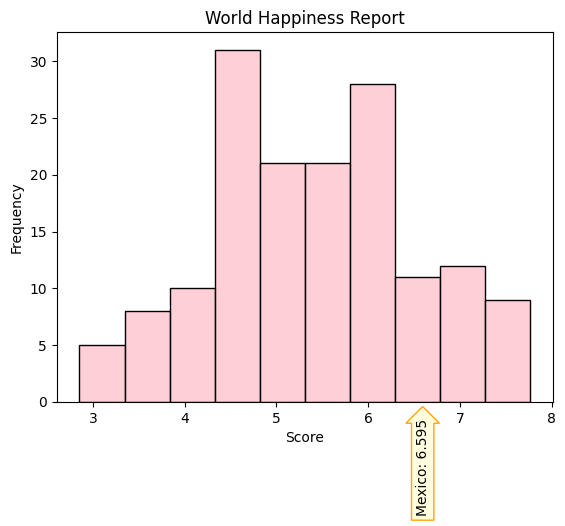

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crer histograma de Score
sns.histplot(data=happiness, x='Score', bins=10, color='pink')

# Crear etiqueta del valor de score de Mexico
mexico_score = mexico['Score'].values[0]
plt.text(x=mexico_score , y=-1.5, s=f'Mexico: {mexico_score}',
         ha='center', va='top', fontsize=10, color='black', rotation=90,
         bbox=dict(facecolor='lightyellow', edgecolor='orange', boxstyle='rarrow,pad=0.3'))

# Personalizar y mostrar el grafico
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

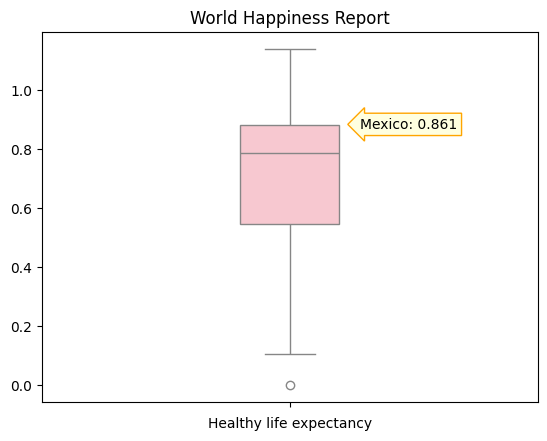

In [6]:
# Crear diagrama de caja para expectativa de vida
sns.boxplot(data=happiness, y='Healthy life expectancy', width=0.2, orient='v',
            color='pink')

# Crear etiqueta del valor de expectativa de vida de Mexico
mexico_life_expectancy = mexico['Healthy life expectancy'].values[0]
plt.text(x=0.24, y=mexico_life_expectancy, s=f'Mexico: {mexico_life_expectancy}',
         ha='center', va='bottom', fontsize=10, color='black',
         bbox=dict(facecolor='lightyellow', edgecolor='orange', boxstyle='larrow,pad=0.3'))

# Personalizar y mostrar el grafico
plt.title('World Happiness Report')
plt.ylabel('')
plt.xlabel('Healthy life expectancy')
plt.show()

Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

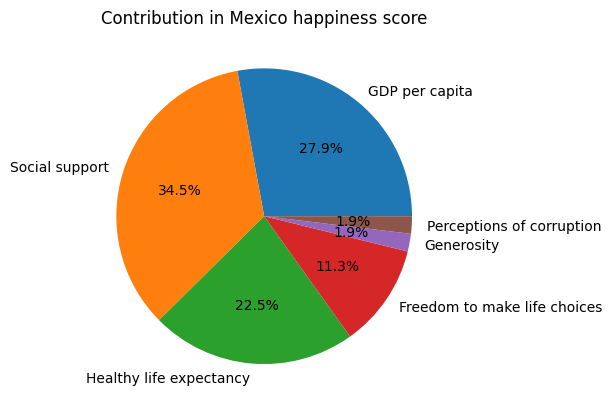

In [7]:
# Crear grafica de pastel, descartar las columnas de rank y country or region
plt.pie(mexico.values[0][2:], labels=mexico.columns[2:], autopct='%1.1f%%')

# Personalizar y mostrar el grafico
plt.title('Contribution in Mexico happiness score')
plt.show()


Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [8]:
happiest_index = happiness['Score'].idxmax()
happiest_country = happiness.loc[[happiest_index]] # doble corchete para regresar df y no serie

saddest_index = happiness['Score'].idxmin()
saddest_country = happiness.loc[[saddest_index]]

japan = happiness.loc[happiness['Country or region'] == 'Japan']
korea = happiness.loc[happiness['Country or region'] == 'South Korea']

five = happiness.loc[happiness['Country or region'] == 'Mexico']
five = pd.concat([five, happiest_country], axis=0)
five = pd.concat([five, saddest_country], axis=0)
five = pd.concat([five, japan], axis=0)
five = pd.concat([five, korea], axis=0)

# Seleccionar solo las columnas de los 6 factores
five = five[['Country or region', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# No leer la documentacion a fondo y hacer hacks
five.set_index('Country or region', inplace=True)
fiveT = five.T
fiveT = fiveT.reset_index()

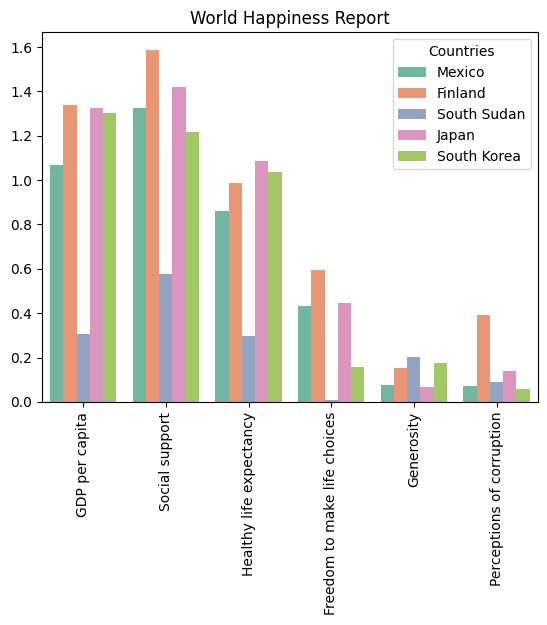

In [9]:
# Melt the DataFrame to long format
df_melted = pd.melt(fiveT, id_vars='index', var_name='Countries', value_name='Value')

# Crear grafica de barras
sns.barplot(data=df_melted, x='index', y='Value', hue='Countries', palette='Set2')

# Personalizar y mostrar el grafico
plt.title('World Happiness Report')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()


Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

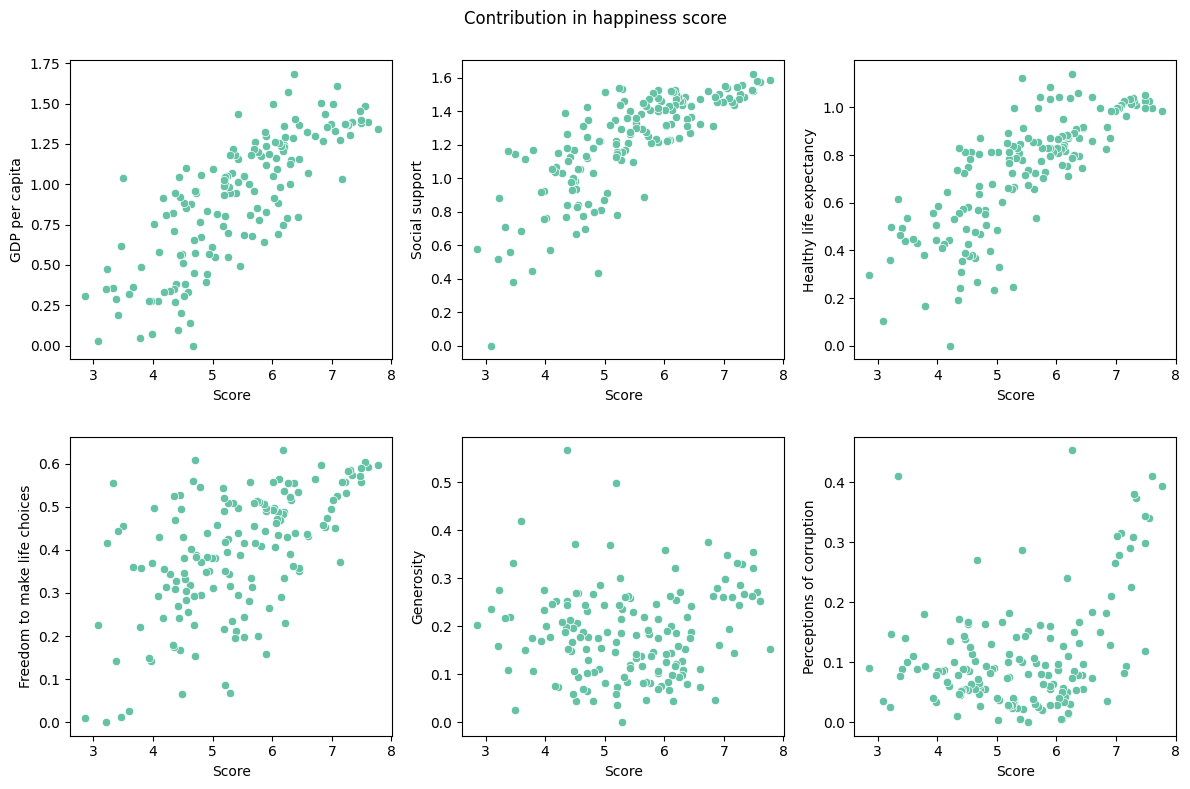

In [52]:
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df_melted = happiness.melt(id_vars='Score', value_vars=factors, var_name='factor', value_name='value')

# Crear matriz de graficas
g = sns.FacetGrid(df_melted, col='factor', col_wrap=3, height=4,
                  sharex=False, sharey=False, despine=False, aspect=1)
that_green = sns.color_palette("Set2")[0]
g.map(sns.scatterplot, 'Score', 'value', color=that_green)

# Ponerle etiquetas a los ejes de cada grafica
for ay, factor in zip(g.axes.flat, df_melted['factor'].unique()):
    ay.set_ylabel(factor)

for ax in g.axes.flat:
    ax.set_xlabel('Score')

# Personalizar y mostrar el grafico
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Evitar que se junten demasiado las graficas
g.fig.suptitle('Contribution in happiness score')
g.set_titles(col_template='')
plt.show()


Comprueba lo anterior con un heatmap donde incluyas los índices de correlación

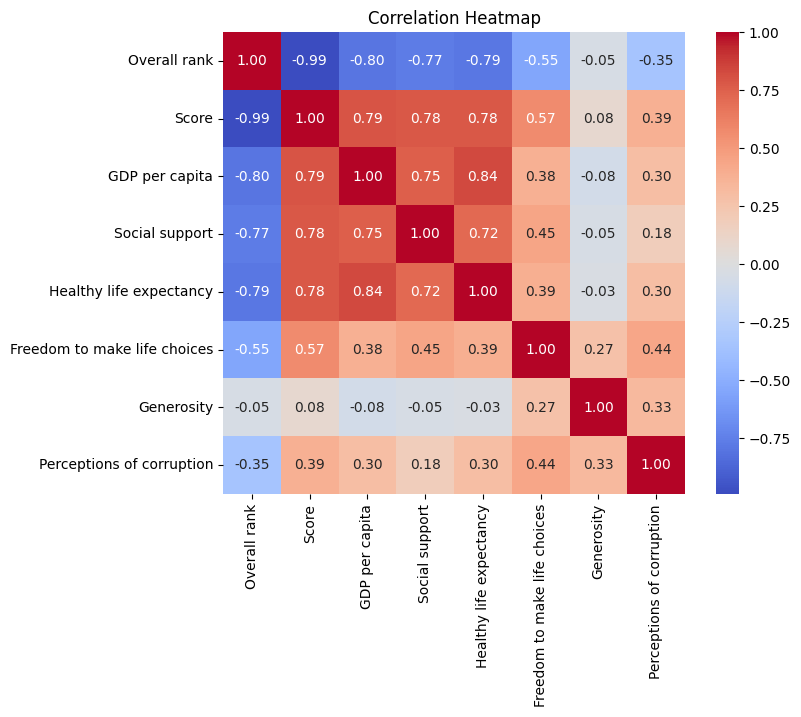

In [61]:
# Calcular matriz de correlacion
df = pd.DataFrame(happiness[['Overall rank', 'Score'] + factors])
correlation_matrix = df.corr()

# Personalizar y mostrar el grafico
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

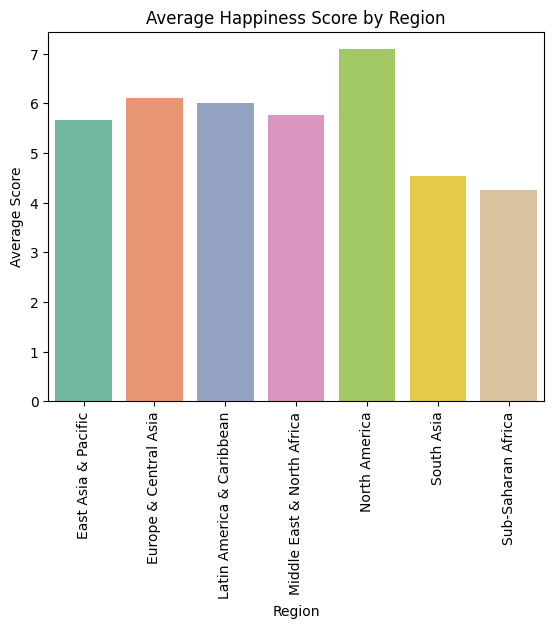

In [75]:
metadata = pd.read_csv(folder_path + "Metadata.csv")
merged_df = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName', how='inner')

averages = merged_df.groupby('Region')['Score'].mean().reset_index() # reset index lo pasa de series a df

# Crear graficas de barras
sns.barplot(data=averages, x='Region', y='Score', hue='Region', palette='Set2')

# Personalizar y mostrar el grafico
plt.title('Average Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()
